![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_negation_classifier_demo_biological_texts.ipynb)


# Training a Sentiment Analysis Classifier with NLU
## 2 Class Biological Negation Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  :

<br>

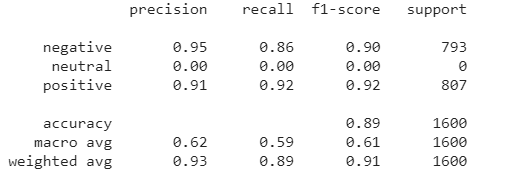


You can achieve these results or even better on this dataset with test  data  :

<br>


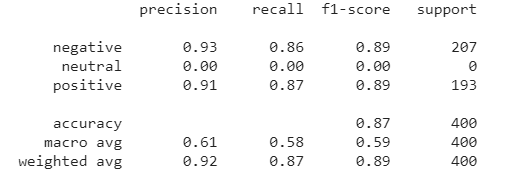










# 1. Colab Setup

In [ ]:
!pip install -q johnsnowlabs

# 2. Download   Negation Bilogical Texts dataset
https://www.kaggle.com/ma7555/bioscope-corpus-negation-annotated
#Context
The BioScope corpus consists of medical and biological texts annotated for negation and their linguistic scope. This was done to allow a comparison between the development of systems for negation/hedge detection and scope resolution.
The corpus is publicly available for research purposes.

You can use this corpus to fine-tune a BERT-like model for negation detection.

This dataset was created in this format during the COVID-19 crisis as a training set for detecting negations regarding treatment of specific drugs in the released research papers.

Creators of the original dataset: MTA-SZTE Research Group on Artificial Intelligence - RGAI
https://rgai.inf.u-szeged.hu/node/105


In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/bioscope_abstract/bioscope_abstract.csv


In [3]:
import pandas as pd
train_path = '/content/bioscope_abstract.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text' and label column should be named 'y' or 'label' or 'labels'
columns=['text','y']
train_df = train_df[columns]
train_df = train_df.dropna()
train_df = train_df.sample(frac=1).reset_index(drop=True)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
7142,These apparent inconsistencies reflect the com...,positive
2305,Different glucocorticoid hormones (GCH) show d...,positive
1203,Northern blot analysis of RNA purified from B ...,positive
2093,These results indicate that E3 is a hematopoie...,positive
7594,"During recent years, studies of insulin-gene r...",positive
...,...,...
3894,It can also be distinguished from other previo...,positive
2990,"We tested the effects of BHA, a phenolic, lipi...",positive
11027,Sequence analyses of pCD41 indicate that there...,positive
9537,"Over a 72-hr period of activation, the express...",positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [4]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
    positive       0.88      1.00      0.94        44

    accuracy                           0.88        50
   macro avg       0.44      0.50      0.47        50
weighted avg       0.77      0.88      0.82        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,These apparent inconsistencies reflect the com...,"[-0.540424644947052, 0.6268006563186646, -0.67...",positive,1.0,These apparent inconsistencies reflect the com...,positive
1,Different glucocorticoid hormones (GCH) show d...,"[-0.7596609592437744, -0.5880932807922363, -0....",positive,3.0,Different glucocorticoid hormones (GCH) show d...,positive
2,Northern blot analysis of RNA purified from B ...,"[-0.5203543305397034, 0.033645179122686386, -0...",positive,2.0,Northern blot analysis of RNA purified from B ...,positive
3,These results indicate that E3 is a hematopoie...,"[-0.7046567797660828, 0.33753958344459534, -0....",positive,4.0,These results indicate that E3 is a hematopoie...,positive
4,"During recent years, studies of insulin-gene r...","[-0.7543756365776062, 0.4511456787586212, -0.9...",positive,4.0,"During recent years, studies of insulin-gene r...",positive
5,"To our knowledge, this constitutes the first i...","[-1.0517436265945435, -0.0811738669872284, -0....",positive,3.0,"To our knowledge, this constitutes the first i...",positive
6,"In contrast, gp41 failed to stimulate NF-kappa...","[-0.8322800397872925, 0.5296803116798401, -0.5...",positive,2.0,"In contrast, gp41 failed to stimulate NF-kappa...",negative
7,Data obtained from studies in our laboratories...,"[-0.7395010590553284, 0.5016824007034302, -0.5...",positive,1.0,Data obtained from studies in our laboratories...,positive
8,RESULTS: Interleukin-6 protein and mRNA produc...,"[-0.06874295324087143, 0.3614305853843689, -0....",positive,8.0,RESULTS: Interleukin-6 protein and mRNA produc...,positive
9,When submitted to an in vitro CD4 cross-linkin...,"[-0.24975398182868958, 0.007427605800330639, -...",positive,2.0,When submitted to an in vitro CD4 cross-linkin...,positive


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("The virus had a direct impact on the nervous system")

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,The virus had a direct impact on the nervous s...,"[-0.4990377724170685, 0.34958764910697937, -0....",positive,1.0


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.96      1.00      0.98        48

    accuracy                           0.96        50
   macro avg       0.48      0.50      0.49        50
weighted avg       0.92      0.96      0.94        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,Based on nucleotide sequence requirements and ...,"[-0.49277549982070923, 0.09530887007713318, -0...",positive,1.0,Based on nucleotide sequence requirements and ...,positive
1,TINUR belongs to the NGFI-B/nur77 family of th...,"[-0.10481061786413193, 0.1171066015958786, -0....",positive,1.0,TINUR belongs to the NGFI-B/nur77 family of th...,positive
2,In selenium-deprived Jurkat and ESb-L T lympho...,"[-1.0812174081802368, 0.5883667469024658, -0.4...",positive,1.0,In selenium-deprived Jurkat and ESb-L T lympho...,positive
3,These findings demonstrate that IFNs inhibit I...,"[-0.9547467231750488, -0.15689292550086975, -0...",positive,1.0,These findings demonstrate that IFNs inhibit I...,positive
4,These data reveal the presence of distinct com...,"[-0.4628618657588959, 0.06154884025454521, -0....",positive,1.0,These data reveal the presence of distinct com...,positive
5,The translated protein showed weak DNA binding...,"[-0.3139030635356903, -0.15748938918113708, -0...",positive,1.0,The translated protein showed weak DNA binding...,positive
6,All tumor cell lines from the B-cell lineage a...,"[0.20084746181964874, -0.4846010208129883, -0....",positive,1.0,All tumor cell lines from the B-cell lineage a...,positive
7,GABP factors bind to a distal interleukin 2 (I...,"[-0.26659855246543884, 0.2846565246582031, -1....",positive,1.0,GABP factors bind to a distal interleukin 2 (I...,positive
8,"In addition, Tax also stimulates the transcrip...","[-0.822009801864624, 0.6354378461837769, -0.34...",positive,1.0,"In addition, Tax also stimulates the transcrip...",positive
9,Mutation of the TCF-1 alpha binding site dimin...,"[-0.6489402651786804, 0.1254355013370514, -0.5...",positive,1.0,Mutation of the TCF-1 alpha binding site dimin...,positive


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [ ]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_128 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df[:1000])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df[:1000],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_128 download started this may take some time.
Approximate size to download 23.4 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       132
    positive       0.87      1.00      0.93       868

    accuracy                           0.87      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.75      0.87      0.81      1000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       348
    positive       0.85      1.00      0.92      2051

    accuracy                           0.85      2399
   macro avg       0.43      0.50      0.46      2399
weighted avg       0.73      0.85      0.79      2399



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlp.load(path=stored_model_path)

preds = hdd_pipe.predict('The virus had a direct impact on the nervous system')
preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,The virus had a direct impact on the nervous s...,"[0.6362331509590149, 0.006696224212646484, 0.2...",positive,4.0


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_128'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_128'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_128'].setDimension(128)             | Info: Number of embedding dimensions | Currently set to : 128
component_list[